# Global Air Quality

## Visualization with Seaborn

In [39]:
#-----------------------------------------------------------------------------------------
# Name:        Practice Day 8
# Author:      Erick Rico
# Created:     10/08/2025
#-----------------------------------------------------------------------------------------

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [41]:
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
df = pd.read_csv("global_air_quality_data_10000.csv")

In [43]:
df.shape

(10000, 12)

In [44]:
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


<Axes: xlabel='PM2.5', ylabel='Temperature'>

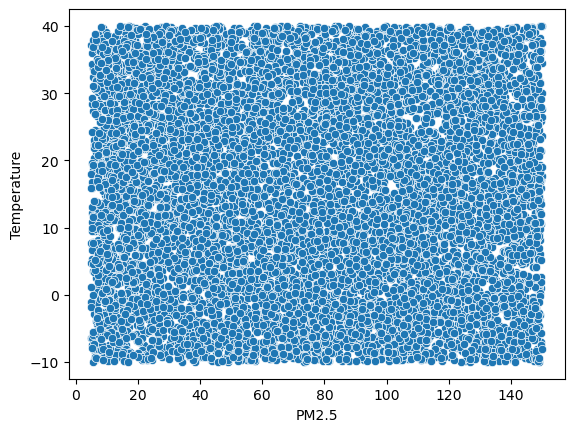

In [45]:
sns.scatterplot(df,
                x="PM2.5",
                y="Temperature")

<Axes: xlabel='PM2.5', ylabel='Temperature'>

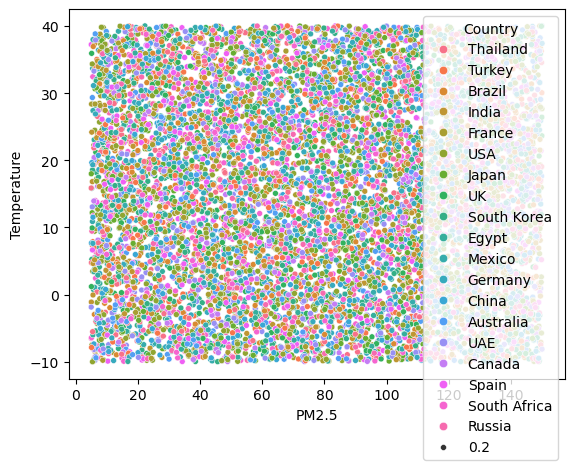

In [46]:
sns.scatterplot(df,
                x="PM2.5",
                y="Temperature",
                hue="Country",
                size=0.2)

In [47]:
# Muestreo aleatorio
df_sample = df.sample(1000)

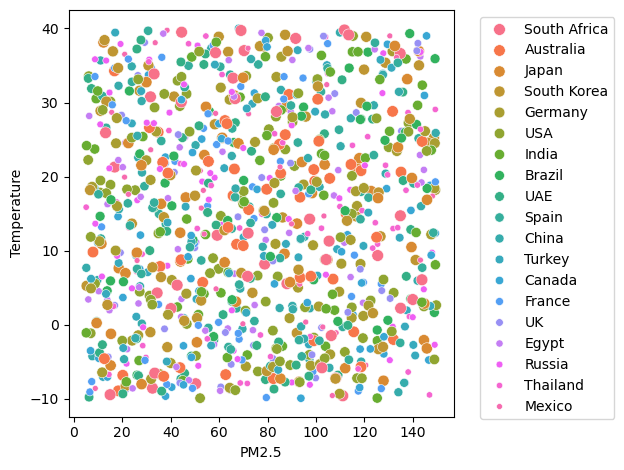

In [48]:
sns.scatterplot(df_sample,
                x="PM2.5",
                y="Temperature",
                hue="Country",
                size="Country")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

- Con este gráfico, tal parece que no hay una relación clara entre la concentración de PM2.5 y la Temperatura.

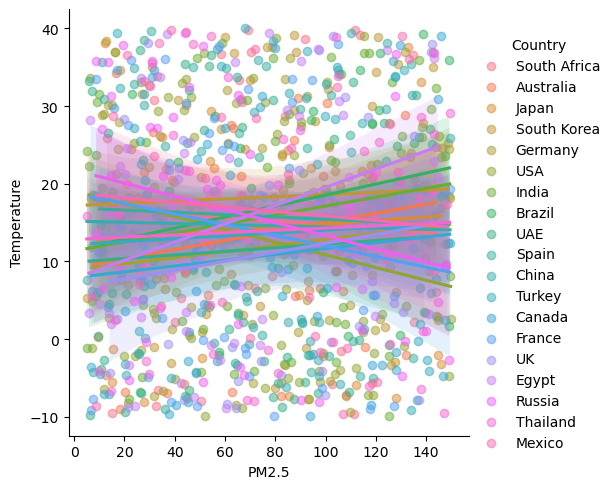

In [49]:
sns.lmplot(df_sample,
                x="PM2.5",
                y="Temperature",
                hue="Country",
                fit_reg=True,
                scatter_kws={"alpha":0.5})

Observaciones:
- No hay una relación clara o fuerte entre PM2.5 y Temperatura en tu muestra, ni a nivel global ni por país.
- Las líneas de regresión son casi planas, lo que indica que, para cada país, la temperatura no cambia mucho aunque cambie el valor de PM2.5.
- El intervalo de confianza ancho sugiere mucha variabilidad y poca certeza en la tendencia.
Los puntos siguen estando dispersos por todo el gráfico, sin un patrón definido.

Conclusiones:
- No se observa una relación lineal significativa entre la concentración de PM2.5 y la temperatura en estos datos, ni siquiera al separar por país.
- Esto puede deberse a que la relación entre estas variables no es lineal, o a que otros factores (como la estacionalidad, ubicación, o condiciones locales) influyen más en la temperatura que la concentración de PM2.5.

In [50]:
regression = LinearRegression()

In [53]:
X = pd.DataFrame(df, columns=['PM2.5'])
y = pd.DataFrame(df, columns=['Temperature']) 
regression.fit(X, y)

print(f"El coeficiente de la pendiente es: {regression.coef_[0][0]:.4f}")
print(f"El intercepto es: {regression.intercept_[0]:.4f}")
print(f"El valor de R^2 es: {regression.score(X,y) * 100:.4f}%")

El coeficiente de la pendiente es: -0.0041
El intercepto es: 15.2159
El valor de R^2 es: 0.0143%


El valor de R^2 confirma lo que visualmente se vio: No hay relación alguna entre estas 2 variables.